# Download the data

In [24]:
# https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [25]:
# !kaggle datasets download -d sakshigoyal7/credit-card-customers

In [26]:
# ls

In [27]:
# !unzip credit-card-customers.zip

In [28]:
# ls

# Read the data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [4]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


# Columns description

- CLIENTNUM - Client number. Unique identifier for the customer holding the account
- Attrition_Flag - Internal event (customer activity) variable, Existing Customer or Attrited Customer
- Customer_Age - Demographic variable - Customer's Age in Years
- Gender - Demographic variable - M=Male, F=Female
- Dependent_count - Demographic variable - Number of dependents
- Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status - Demographic variable - Married, Single, Divorced, Unknown
- Income_Category - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > 
- Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book - Period of relationship with bank
- Total_Relationship_Count - Total no. of products held by the customer
- Months_Inactive_12_mon - No. of months inactive in the last 12 months
- Contacts_Count_12_mon - No. of Contacts in the last 12 months
- Credit_Limit - Credit Limit on the Credit Card
- Total_Revolving_Bal - Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1) 
- Total_Trans_Amt - Total Transaction Amount (Last 12 months)
- Total_Trans_Ct - Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1) 
- Avg_Utilization_Ratio - Average Card Utilization Ratio

Your goal is to predict whether the client will churn or not. 

# 1. What is the target column?

- Attrition_Flag
- Marital_Status
- Gender
- Months_on_book
- Avg_Utilization_Ratio

In [5]:
print(df['Attrition_Flag'].unique())

['Existing Customer' 'Attrited Customer']


In [6]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

# 2. Transform target column

Transform target column to 1/0 format, 1 if the client will churn, 0 otherwise. What is the percetange of churned customers?

In [7]:
df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)
df['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [8]:
percent = df['Attrition_Flag'].value_counts()[1] / df['Attrition_Flag'].shape[0] * 100
print(round(percent, 2), "%")

16.07 %


# Drop `CLIENTNUM` column, as all clients are unique

In [9]:
df = df.drop('CLIENTNUM', axis=1)

# 3. Analyse columns, which are numerical, which are categorical?

How many numerical and categorical columns do you have (excluding target variable)


- 5 categorical columns and 14 numerical

# 4. Perform EDA (optional)

Plot 1-5 Graphs looking for interesting data patterns. Each graph must contain a short description. You can use ChatGPT to generate ideas for graphs. If you use ChatGPT include your prompt into the document. Each of 5 graphs worth 1 point.

Checklist:
1. For each graph:
    1. Graph
        - has title
        - has labels for OX and OY 
        - has legend
    2. Graph description (<100 words)
    3. ChatGPT prompt included (if you've used one)
2. All graphs in a single pdf document

Put all graphs into a single doc file, save it as pdf and upload to the google form. For reference, this whole text is 105 words.

In [10]:
df.shape

(10127, 20)

#  5. What are the different ways to handle categorical columns?


Before training machine learning algorithm we need to convert categorical columns



There are several ways to handle categorical columns:

1. One-Hot Encoding: This technique creates a binary column for each category in the categorical variable. 
2. Label Encoding: This technique assigns a numerical value to each category in the categorical variable.
3. Ordinal Encoding: This technique assigns a numerical value to each category in the categorical variable based on the order of importance or hierarchy. 
4. Binary Encoding: This technique creates binary columns for each category in the categorical variable, but instead of using a one-hot encoding, it uses binary digits to represent the categories. 

# 6. Encode categorical columns with 1-hot encoding

How many binary columns after encoding do you have? Use `OneHotEncoder` from `slearn.preprocessing` module with `sparse=False` parameter. See example below.


In [11]:
# Example dataframe
df_example = pd.DataFrame([['Male', 1], ['Female', 3], ['Female', 2]], columns=['Sex', 'Age'])
df_example

,Sex,Age
0,Male,1
1,Female,3
2,Female,2


In [12]:
from sklearn.preprocessing import OneHotEncoder

# Set names of categorical columns
categorical_columns = ['Sex']

# Create OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Transform categorical columns and save them into array
cat_encoded = encoder.fit_transform(df_example[categorical_columns],)

# Save categorical columns to pandas.DataFrame, with correct column names
df_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Check the resulting DataFrame
df_encoded.head()

/Users/alexglushko/PycharmProjects/ds-for-business/venv/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Sex_Female,Sex_Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0


In [13]:
# Set names of categorical columns
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Create OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False)

# Transform categorical columns and save them into array
cat_encoded = encoder.fit_transform(df[categorical_columns],)

# Save categorical columns to pandas.DataFrame, with correct column names
df_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Check the resulting DataFrame
df_encoded.head()

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
df_encoded.shape

(10127, 23)

# Drop original categorical columns and concat encoded with the numerical columns

assuming your encoded columns are in `df_encoded` variable

In [15]:
df = df.drop(categorical_columns, axis=1)

In [16]:
df = pd.concat([df, df_encoded], axis=1)

In [17]:
df.head(3)

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# 7. Split data intro train and test parts

Set the size of the test set to 30%, use startification over the target column (to preserve target ratio in train and test sets). Use `random_state=10`. How many observations do you have in your test set?


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train, df_test = train_test_split(
    df, test_size=0.3, stratify=df['Attrition_Flag'], random_state=10) 

In [20]:
df_test.shape

(3039, 38)

# 8. This is a binary classification problem with  imbalanced classes, what are the appropriate metrics for this task?

select all which apply

- accuracy score
- roc auc score
- f1 score
- mean absolute error
- r-squared
- precision

Mean absolute error and r-squared are metrics for regression, so we won't use them and is not so good approach for unbalanced dataset, becouse we will have overfitting.
So we can use: 
- roc auc score
- f1 score
- precision

# 9. Train a Random Forest Classifier on a `train` set

Use RandomForestClassifier with default hyperparameters. What is the f1 score of a trained model on a test set?

In [26]:
X_train = df_train.drop("Attrition_Flag", axis=1)
y_train = df_train['Attrition_Flag']
X_test = df_test.drop("Attrition_Flag", axis=1)
y_test = df_test['Attrition_Flag']
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier()

model.fit(X_train, y_train)
prediction = model.predict(X_test)
f1_score(y_test, prediction)

0.8295964125560538

In [34]:
y_pred_rf = model.predict_proba(X_test)
y_pred_rf

array([[0.98, 0.02],
       [0.32, 0.68],
       [0.91, 0.09],
       ...,
       [1.  , 0.  ],
       [0.9 , 0.1 ],
       [0.07, 0.93]])

# 10. Build a confusion matrix with a default probability threshold (0.5)

To analyse the resulting algorithm we will take a closer look on individual predictions. How many False Positives and False Negatives do you have?


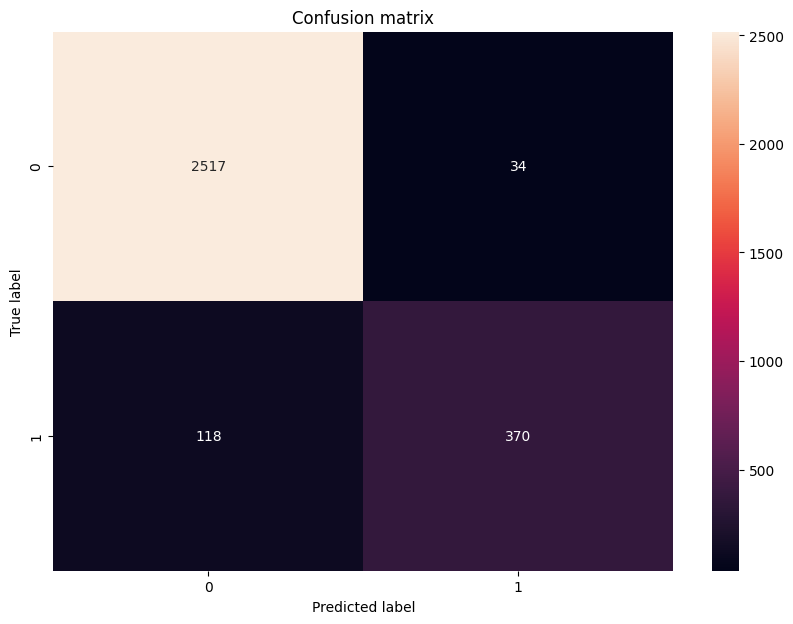

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_rf[:, 1]>0.5)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

- False positive: 43
- False negative: 118

# 11. We will change probability threshold from 0.05 to 0.95 with step 0.05

What happens to the number of True Positives and to the number of False Negatives, as you increase the probability threshold?


In [38]:
import numpy as np

In [39]:
true_positives = []
false_negatives = []
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_rf[:, 1]>t)
    tp, fn = cm[1,1], cm[1,0]
    true_positives.append(tp)
    false_negatives.append(fn)

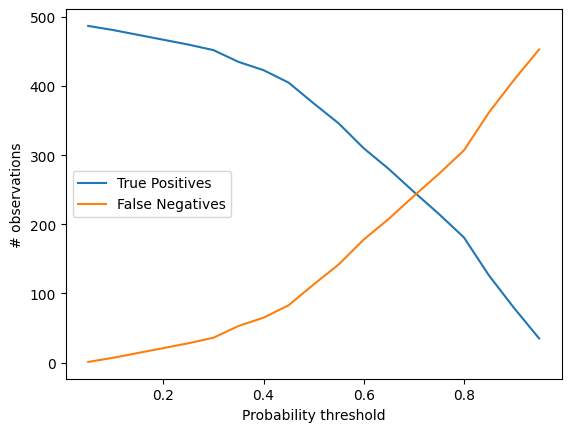

In [40]:
plt.plot(np.linspace(0.05,0.95,19), true_positives, label='True Positives')
plt.plot(np.linspace(0.05,0.95,19), false_negatives, label='False Negatives')
plt.xlabel('Probability threshold')
plt.ylabel('# observations')
plt.legend();

As we increase the probability threshold our predictions become more conservative (predict Churn only for observations with high probability), therefore Number of TP decreases and number of FN increases

# 12. Estimate revenue

Let's consider a toy economic setup:
1. Each client earns a company $50\$$ per month
2. If you predict that a client will churn, the company can provide she with a discount of $200\$$ and the client will stay for another year

If the company do nothing (has no Churn model), then the revenue over the year will be:

$$S = N*50*12 + P*0$$

where N (negative) is number of non-Churn clients, and P (positive) is number of clients who Churn. If the company implements some Churn model, the revenue will be the following:

$$S = TN*50*12 + FP*(50*12-200) + TP*(50*12-200)  + FN * 0$$

where 
- TN are non-Churning clients, predicted as non-Churning (true negatives)
- FP are non-Churning clients, predicted as Churning (false positives)
- TP are Churning clients, predicted as Churning (true positives)
- FN are Churning clients, predicted as non-Churning (false negatives)

## Compute the revenue for different thresholds based on your model, what is the optimal probability threshold? Report two numbers divided by a comma, e.g. `0.5,1500000`

In [ ]:
profit = []
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(df_test['Attrition_Flag'], y_pred_rf[:, 1]>t)
    tn, fp, tp, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
    S = tn*50*12 + fp*(50*12-200) + tp*(50*12-200) 
    profit.append(S)

In [ ]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

# 13. Compute economic value

Is there any economic value from introducing a ML model (compared to not using a model and not providing a discounts)?

First scenario - no ML model, no discounts; Second scenario - ML model from question 12.

# 14. Build a confusion matrix

assosiated with an optimal probability threshold. What happend to the number of False Positives and False Negatives, compared to the default probability threshold (question 10)?

# 15. What if the price to keep the client goes up to 500?

Does optimal probability treshold changes?

# 16. Built an assosiated confusion matrix

How many False Positives and False Negatives do you have?

# 17. Compare confusion matrices from 14 and 16



# 18. Train catboost

Train a catboost.CatBoostClassifier on a **unprocessed data** (no preprocessing for categorical columns) with default hyperparameters, see example below.

In [ ]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Attrition_Flag'])

In [ ]:
categorical_columns = [...] # put all categorical columns names instead of ...

In [ ]:
clf = CatBoostClassifier()

In [ ]:
clf.fit(df_train.drop('Attrition_Flag', axis=1), df_train['Attrition_Flag'], cat_features=categorical_columns)

# 19. Compute ROC AUC score for your RandomForest and Catboost model

Comment on how increase/decrease in roc auc (machine learning metric) compares with increase/decrease of revenue (business metric). Propose how you could improve the economic model to make it more realistic (and how to use your ML model in this new setup). Upload a pdf, up to 500 words.